In [81]:
import re
import nltk
import os
from datetime import date as d
from wordcloud import WordCloud 
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
from collections import Counter, defaultdict

# Sentiment Analysis

## To Do: Analyze Sentiment

In [32]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')
sia = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/debbie/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [82]:
weeklySentis = defaultdict(dict)

for folder in os.listdir("cleaned_data"):
    keyword = folder.split("_")[0]
    for file in os.listdir(f"cleaned_data/{folder}"):
        with open(f"cleaned_data/{folder}/{file}") as fp:
            text = fp.read()
        print(file)
        month, day = file.split("_")[1][:-4].split(".")
        if (month == "12"):
            year = 2019
        else:
            year = 2020

        date = d(year, int(month), int(day))        
        pol = sia.polarity_scores(text)    
        weeklySentis[keyword][date] = pol


virus_04.05.txt
virus_04.12.txt
virus_03.22.txt
virus_01.26.txt
virus_01.19.txt
virus_03.08.txt
virus_12.29.txt
virus_02.02.txt
virus_02.16.txt
virus_02.09.txt
virus_02.23.txt
virus_04.19.txt
virus_01.12.txt
virus_01.05.txt
virus_03.29.txt
virus_03.01.txt
virus_03.15.txt
fauci_01.26.txt
fauci_03.22.txt
fauci_03.08.txt
fauci_01.19.txt
fauci_04.05.txt
fauci_04.12.txt
fauci_02.02.txt
fauci_02.16.txt
fauci_12.29.txt
fauci_02.09.txt
fauci_02.23.txt
fauci_01.12.txt
fauci_03.29.txt
fauci_03.01.txt
fauci_03.15.txt
fauci_01.05.txt
fauci_04.19.txt
chinese_12.29.txt
chinese_02.02.txt
chinese_02.16.txt
chinese_04.05.txt
chinese_04.12.txt
chinese_03.22.txt
chinese_01.26.txt
chinese_01.19.txt
chinese_03.08.txt
chinese_04.19.txt
chinese_01.12.txt
chinese_01.05.txt
chinese_03.01.txt
chinese_03.15.txt
chinese_03.29.txt
chinese_02.09.txt
chinese_02.23.txt
coronavirus_01.26.txt
coronavirus_03.22.txt
coronavirus_03.08.txt
coronavirus_01.19.txt
coronavirus_04.05.txt
coronavirus_04.12.txt
coronavirus_02.16.

## Completed: Created basic visualizations for sentiments
## To Do: Polish visualizations

In [70]:
def byDate(tup):
    return tup[0]

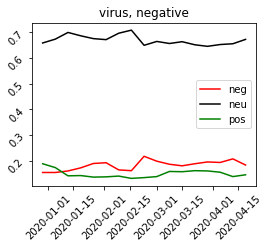

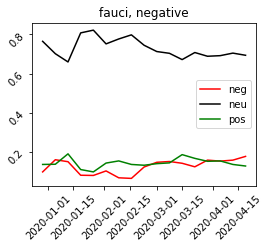

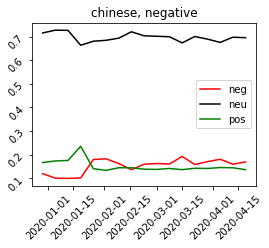

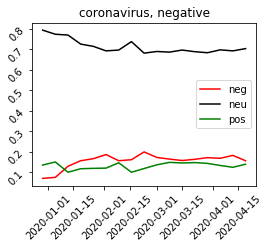

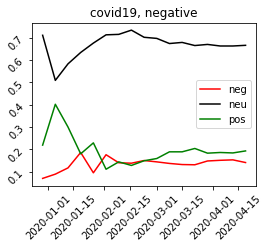

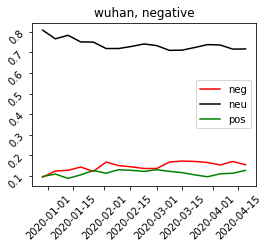

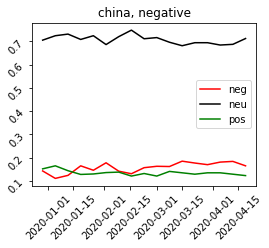

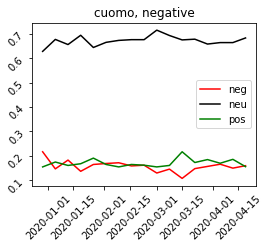

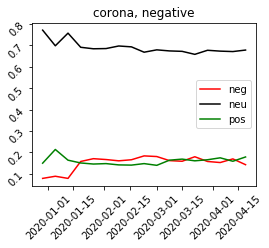

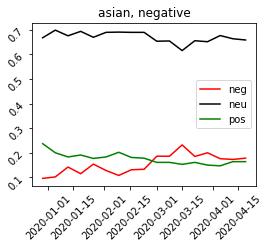

In [84]:
for keyword in keywords:
    keySentis = weeklySentis[keyword]
    fig, subs = plt.subplots(1, sharey = True, figsize=(4,3))
    
    points = []
    for date, sentis in keySentis.items():
        points.append((date, sentis))
        
    points = sorted(list(points), key=byDate)
    x, sentis = zip(*points)
    
    yNeg = [senti["neg"] for senti in sentis]
    yNeu = [senti["neu"] for senti in sentis]
    yPos = [senti["pos"] for senti in sentis]
    
    subs.plot(x, yNeg, color='red', label="neg")
    subs.plot(x, yNeu, color='black', label="neu")
    subs.plot(x, yPos, color='green', label="pos")
    subs.legend()
    subs.tick_params(labelrotation=45)
    subs.set_title(f"{keyword}, negative")
    plt.show()
    
        


# Word Frequency

## Completed: Count Words

In [46]:
# list of keywords
exclude = ["virus", "corona", "coronavirus"]

# Create counters that track the total word frequency across all tweets and also weekly 
# counters by keyword
keywords = []
weeklyCounters = defaultdict(dict)
totalCounter = Counter()
for folder in os.listdir("cleaned_data"):
    keyword = folder.split("_")[0]
    keywords.append(keyword)
    for file in os.listdir(f"cleaned_data/{folder}"):
        with open(f"cleaned_data/{folder}/{file}") as fp:
            splitText = fp.read()[5:].split()
            
        filtered = [w.lower() for w in splitText if not w.lower() in exclude] 
        weeklyCounter = Counter(filtered)
        weeklyCounters[keyword][file[len(keyword) + 1:-4]] = weeklyCounter
        totalCounter.update(splitText)

## To Do: Create Visualizations for Word Frequency

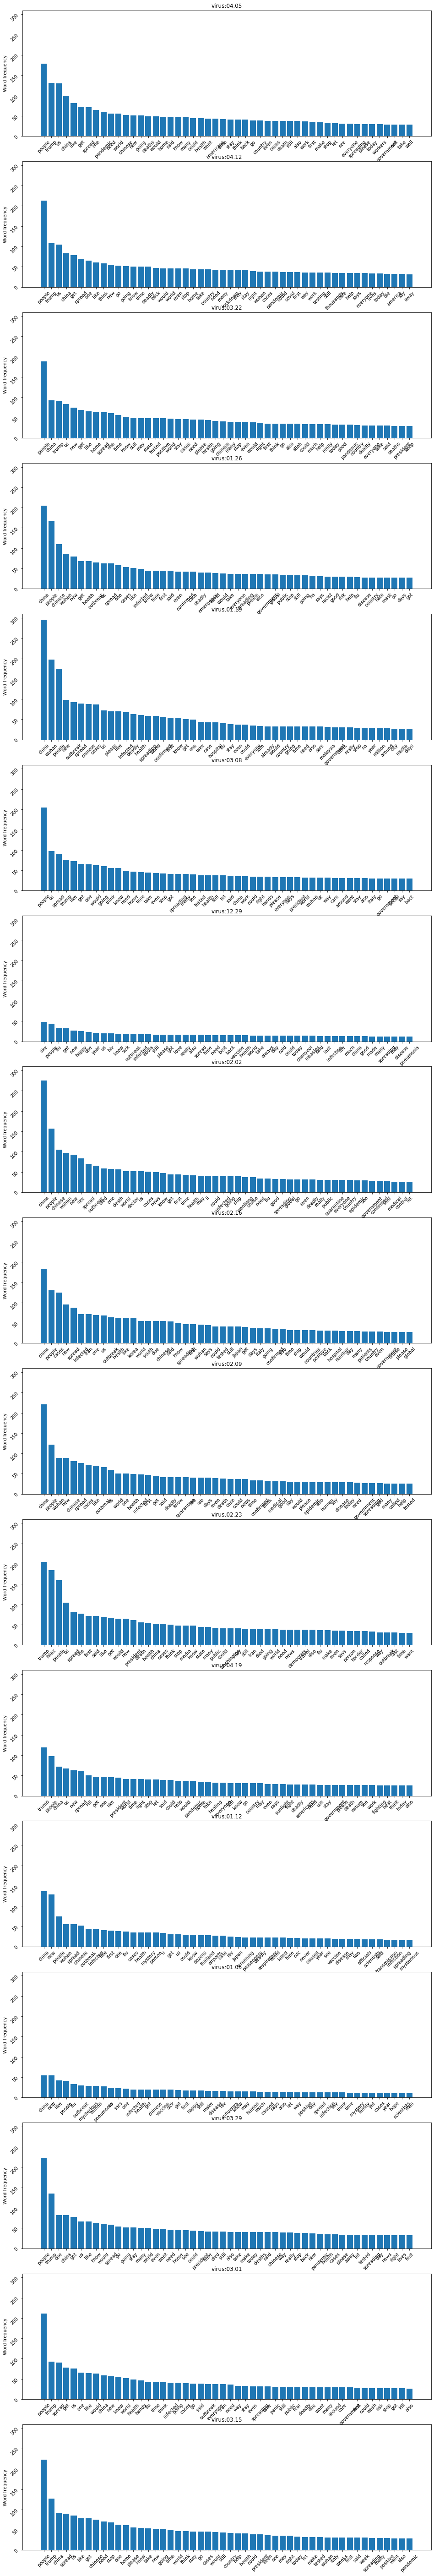

In [49]:
for keyword in keywords:
    keyCounters = weeklyCounters[keyword]
    fig, subs = plt.subplots(len(keyCounters), sharey=True, figsize=(16, len(keyCounters)* 6))
    i = 0
    for date, counter in keyCounters.items():
        words, count = zip(*counter.most_common(50))
        subs[i].bar(words, count)
        subs[i].set_ylabel("Word frequency")
        subs[i].set_title(f"{keyword}:{date}")
        subs[i].tick_params(labelrotation=45)
        i += 1
    plt.show()
    break
        


<function matplotlib.pyplot.show(*args, **kw)>

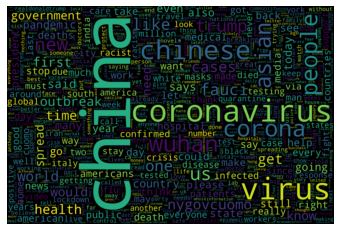

In [50]:
wc = WordCloud(max_words=1000, width=2400, height=1600)
wc.generate_from_frequencies(totalCounter)
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show